# Лабораторная работа №6. Обучение без учителя. Задача кластеризации

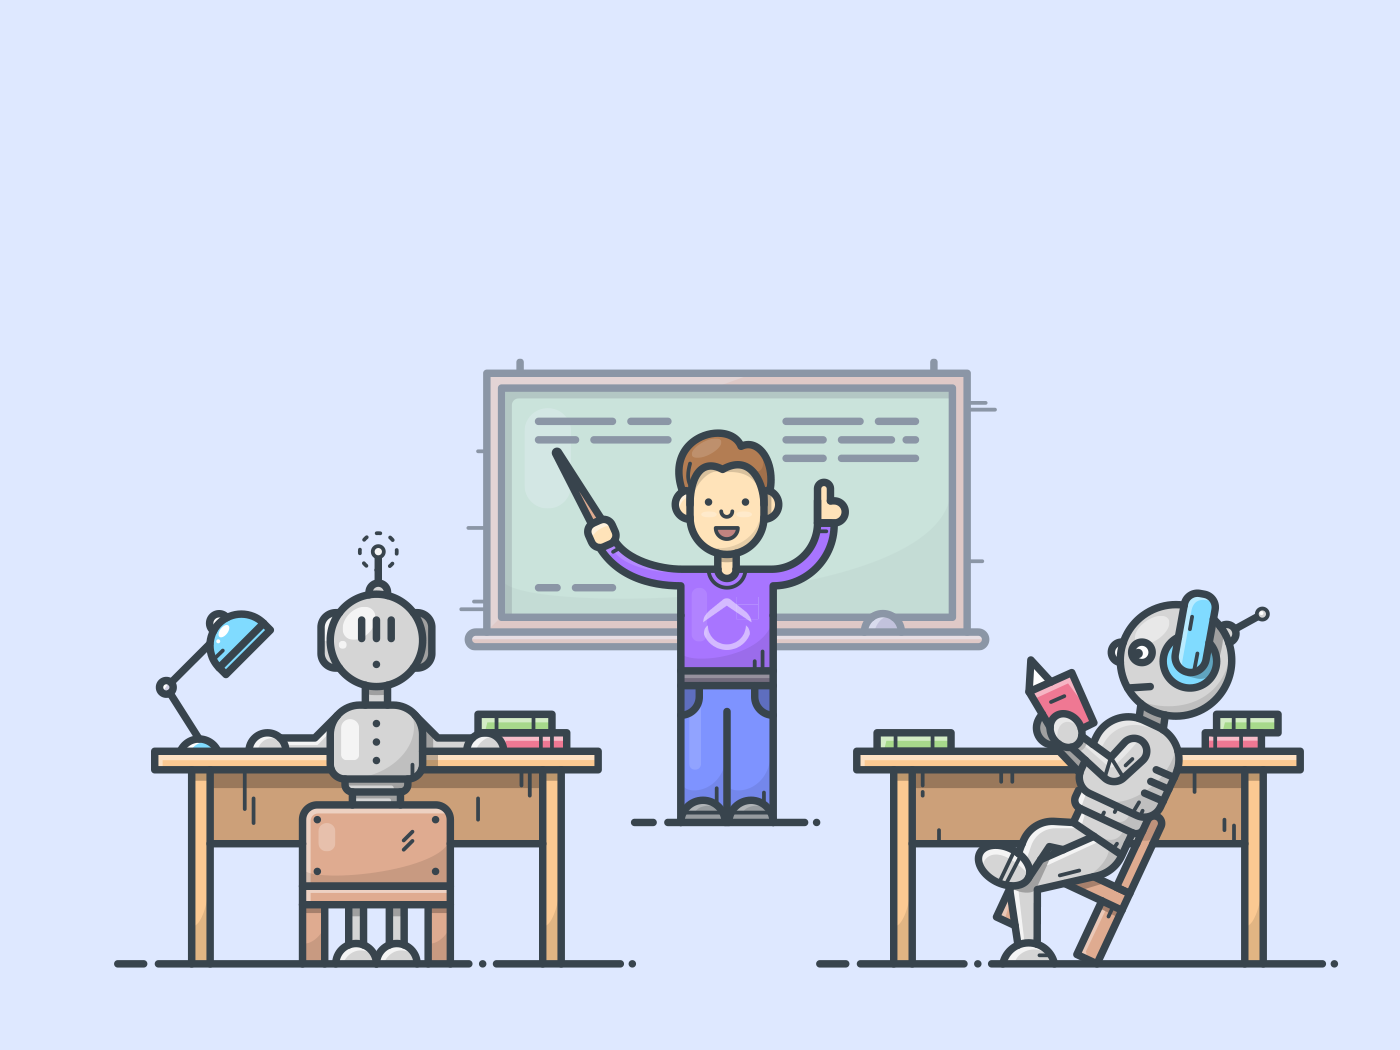

# Импорт всего

In [2]:
from sklearn.datasets import make_classification
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, rand_score, make_scorer, calinski_harabasz_score
import pandas as pd
from scipy.stats import zscore
from pprint import pprint

## Все реализованные нужные нам функции

In [3]:
def elbow_method(data, num_clusters_range=10):
    scores = []

    for iteration in range(1, num_clusters_range + 1):
        model = KMeans(n_clusters=iteration, n_init='auto').fit(data)
        scores.append(model.inertia_)

    return scores

In [4]:
def plot_schedule(data, model, title):
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=70, c='red')
    plt.title(title)
    plt.show()

In [5]:
def get_metrics(data, y, model) -> dict:
    try:
      y_pred = model.labels_
    except:
      y_pred = model.predict(data)

    metrics = {
        'silhouette_score': round(silhouette_score(data, y_pred), 2),
        'calinski_harabasz_score': round(calinski_harabasz_score(data, y_pred),2),
        'rand_score' : round(rand_score(y_pred, y), 2),
        'adjusted_rand_score' : round(adjusted_rand_score(y, y_pred), 2),
    }

    return metrics

In [6]:
def print_metrics(title, model1, model2, model3):
    dict_dataset_metrics = dict()
    for index, (X, y, model) in enumerate([(X_one, y_one, model1), (X_two, y_two, model2), (X_three, y_three, model3)]):
        metrics = get_metrics(X, y, model)
        dict_dataset_metrics['{} {}'.format(title,index+1)] = metrics
    pprint(dict_dataset_metrics)

## Создание трех датасетиков

In [7]:
X_one, y_one = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=98)
X_two, y_two = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=13)
X_three, y_three = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=27)

In [8]:
z_scores = zscore(X_two)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.5).all(axis=1)
X_two = X_two[filtered_entries]
y_two = y_two[filtered_entries]

In [9]:
z_scores = zscore(X_three)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
X_three = X_three[filtered_entries]
y_three = y_three[filtered_entries]

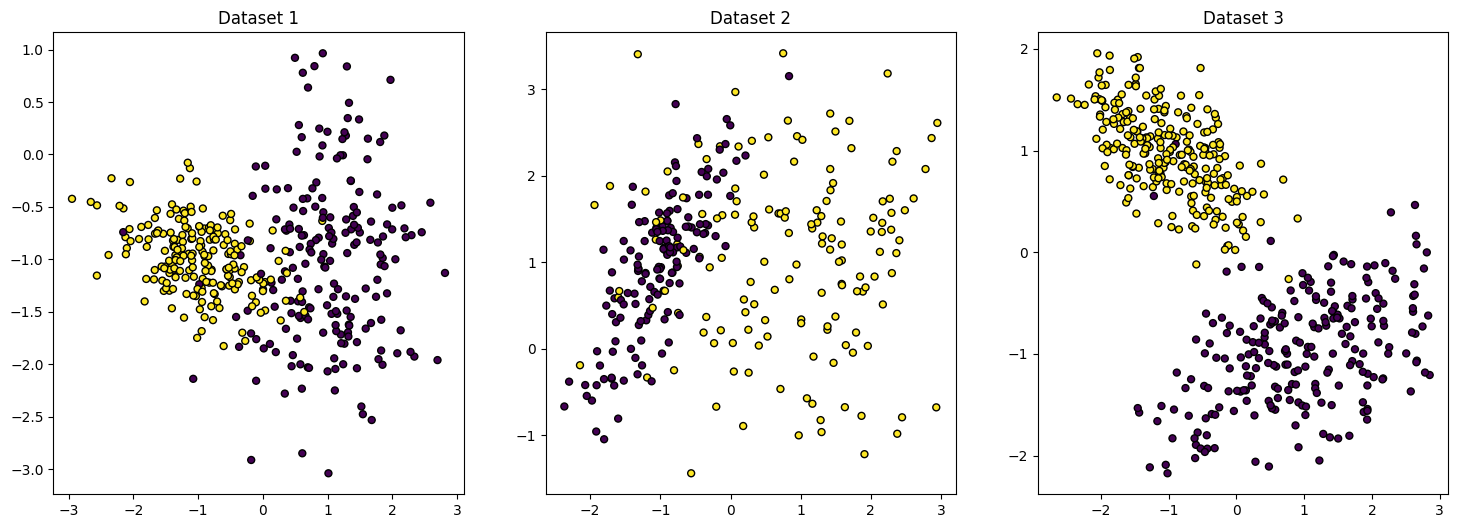

In [10]:
plt.figure(figsize=(18, 6))
for index, (data, y) in enumerate([(X_one, y_one), (X_two, y_two), (X_three, y_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], marker="o", c=y, s=25, edgecolor="k")
    plt.title(f"Dataset {index+1}")
plt.show()

## KMeans

In [11]:
kmeans_dataset_one = KMeans(n_init='auto').fit(X_one)
kmeans_dataset_two = KMeans(n_init='auto').fit(X_two)
kmeans_dataset_three = KMeans(n_init='auto').fit(X_three)

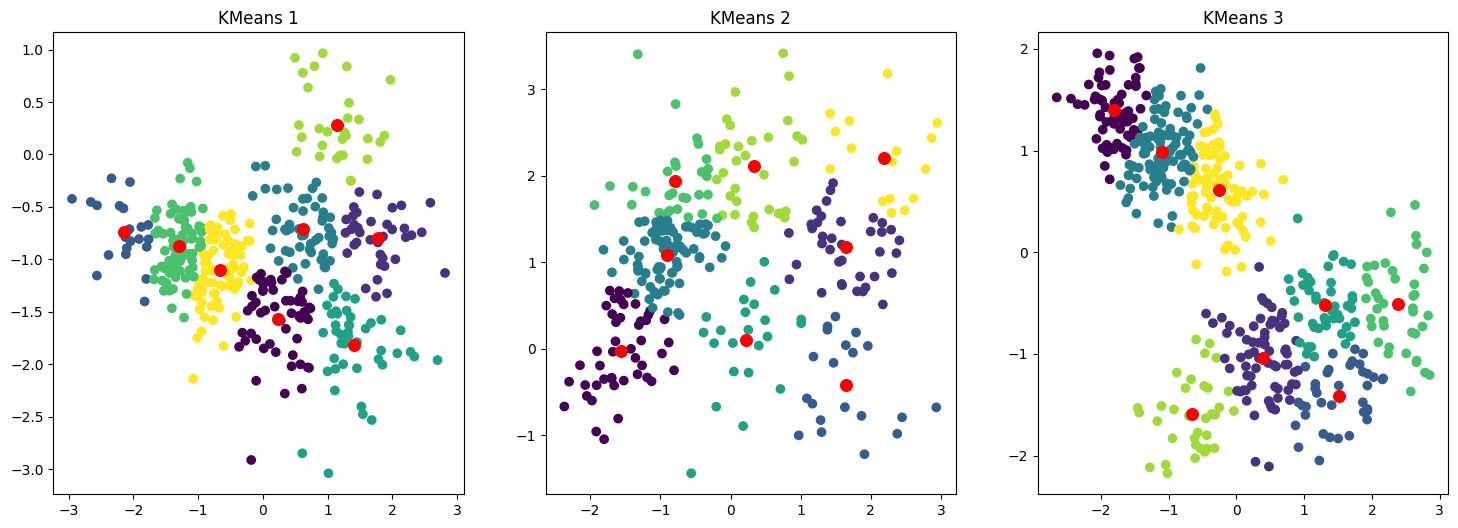

In [12]:
plt.figure(figsize=(18, 6))
for index, files in enumerate([(X_one, kmeans_dataset_one), (X_two,kmeans_dataset_two), (X_three, kmeans_dataset_three)]):
    data = files[0]
    model = files[1]
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=70, c='red')
    plt.title(f"KMeans {index+1}")
plt.show()

In [13]:
print_metrics("KMeans", kmeans_dataset_one, kmeans_dataset_two, kmeans_dataset_three)

{'KMeans 1': {'adjusted_rand_score': 0.23,
              'calinski_harabasz_score': 468.34,
              'rand_score': 0.61,
              'silhouette_score': 0.37},
 'KMeans 2': {'adjusted_rand_score': 0.18,
              'calinski_harabasz_score': 272.34,
              'rand_score': 0.59,
              'silhouette_score': 0.35},
 'KMeans 3': {'adjusted_rand_score': 0.27,
              'calinski_harabasz_score': 891.43,
              'rand_score': 0.63,
              'silhouette_score': 0.38}}


## KMeans с подбором

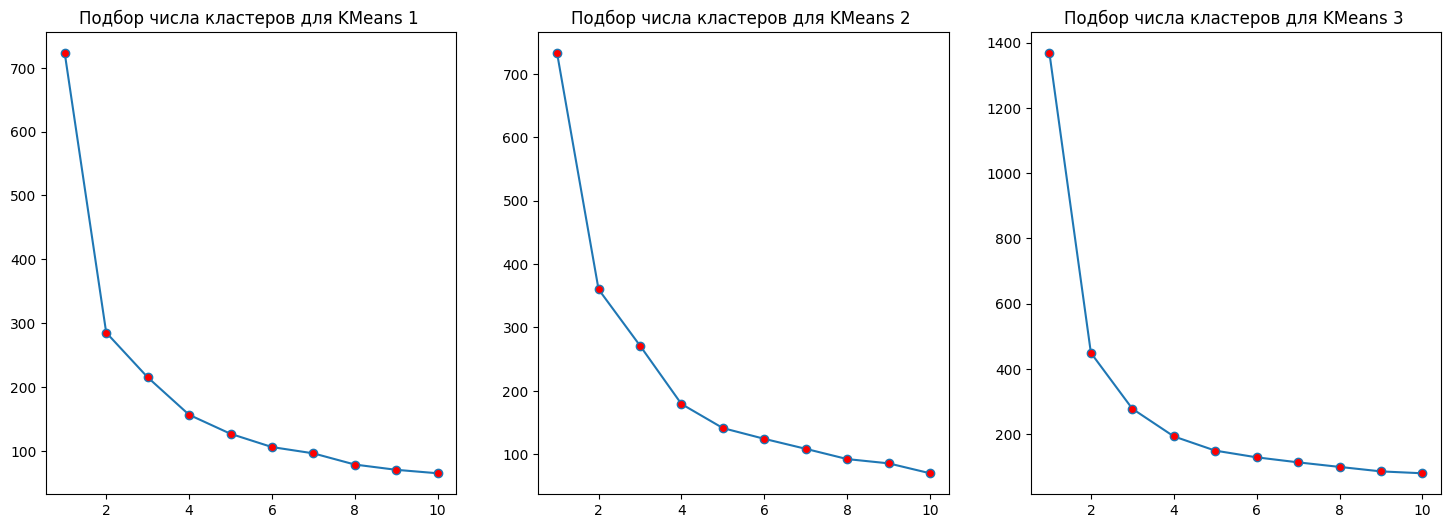

In [14]:
iterations = 10
plt.figure(figsize=(18, 6))
for index, data in enumerate([X_one, X_two, X_three]):
    results_iter = elbow_method(data, iterations)
    plt.subplot(1, 3, index+1)
    plt.plot(range(1, iterations+1), results_iter, marker='o', markerfacecolor=[1, 0, 0, 1])
    plt.title("Подбор числа кластеров для KMeans {} ".format(index+1))
plt.show()

In [15]:
kmeans_dataset_one = KMeans(n_clusters = 7, n_init='auto').fit(X_one)
kmeans_dataset_two = KMeans(n_clusters = 7, n_init='auto').fit(X_two)
kmeans_dataset_three = KMeans(n_clusters = 5, n_init='auto').fit(X_three)

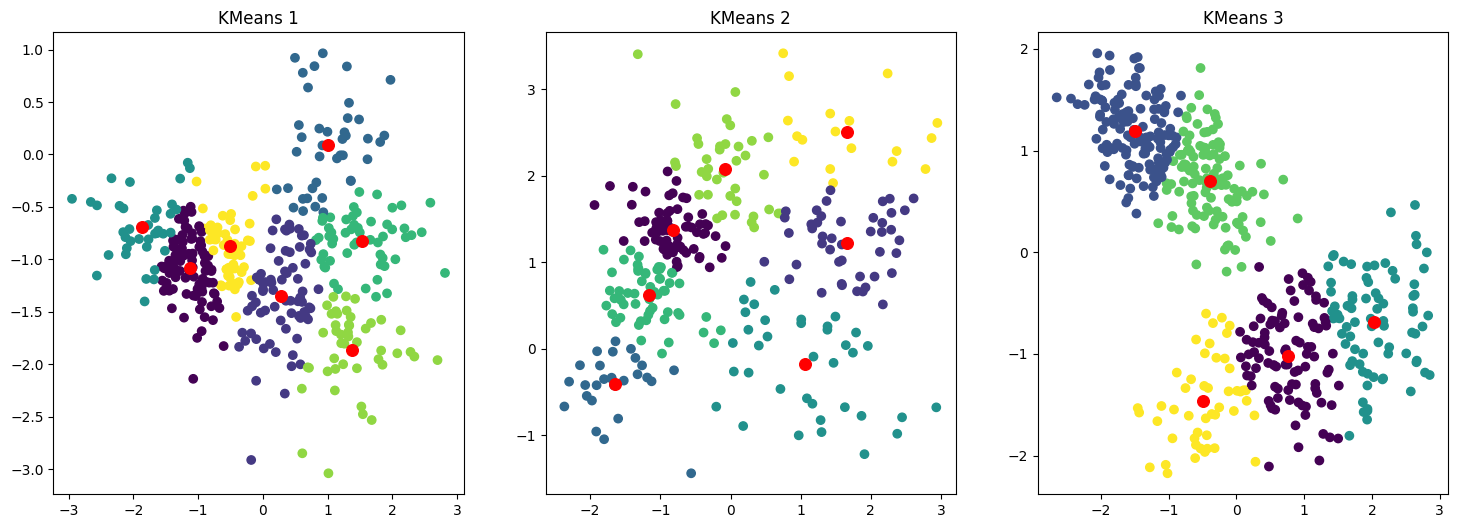

In [16]:
plt.figure(figsize=(18, 6))
for index, (data, model) in enumerate([(X_one, kmeans_dataset_one), (X_two,kmeans_dataset_two), (X_three, kmeans_dataset_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=70, c='red')
    plt.title(f"KMeans {index+1}")
plt.show()

In [17]:
print_metrics("KMeans", kmeans_dataset_one, kmeans_dataset_two, kmeans_dataset_three)

{'KMeans 1': {'adjusted_rand_score': 0.23,
              'calinski_harabasz_score': 421.88,
              'rand_score': 0.61,
              'silhouette_score': 0.32},
 'KMeans 2': {'adjusted_rand_score': 0.16,
              'calinski_harabasz_score': 266.39,
              'rand_score': 0.58,
              'silhouette_score': 0.35},
 'KMeans 3': {'adjusted_rand_score': 0.41,
              'calinski_harabasz_score': 957.23,
              'rand_score': 0.71,
              'silhouette_score': 0.43}}


# Собственная реализация KMeans

In [23]:
class KMeans_:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centers = X[np.random.choice(len(X), self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2), axis=1)
            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centers == new_centers):
                break

            self.centers = new_centers

    def predict(self, X):
        return np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2), axis=1)

In [27]:
kmeans_o = KMeans_()
kmeans_t = KMeans_()
kmeans_th = KMeans_()

In [28]:
kmeans_o.fit(X_one)
kmeans_t.fit(X_two)
kmeans_th.fit(X_three)

In [29]:
print_metrics("My KMeans", kmeans_o, kmeans_t, kmeans_th)

{'My KMeans 1': {'adjusted_rand_score': 0.73,
                 'calinski_harabasz_score': 609.73,
                 'rand_score': 0.87,
                 'silhouette_score': 0.52},
 'My KMeans 2': {'adjusted_rand_score': 0.44,
                 'calinski_harabasz_score': 299.85,
                 'rand_score': 0.72,
                 'silhouette_score': 0.48},
 'My KMeans 3': {'adjusted_rand_score': 0.93,
                 'calinski_harabasz_score': 970.37,
                 'rand_score': 0.97,
                 'silhouette_score': 0.59}}


## DBSCAN

In [17]:
dbscan_one = DBSCAN().fit(X_one)
dbscan_two = DBSCAN().fit(X_two)
dbscan_three = DBSCAN().fit(X_three)

In [18]:
print("Количество уникальных labels для Dataset_one {}".format(len(np.unique(dbscan_one.labels_))))
print("Количество уникальных labels для Dataset_two {}".format(len(np.unique(dbscan_two.labels_))))
print("Количество уникальных labels для Dataset_three {}".format(len(np.unique(dbscan_three.labels_))))

Количество уникальных labels для Dataset_one 2
Количество уникальных labels для Dataset_two 2
Количество уникальных labels для Dataset_three 1


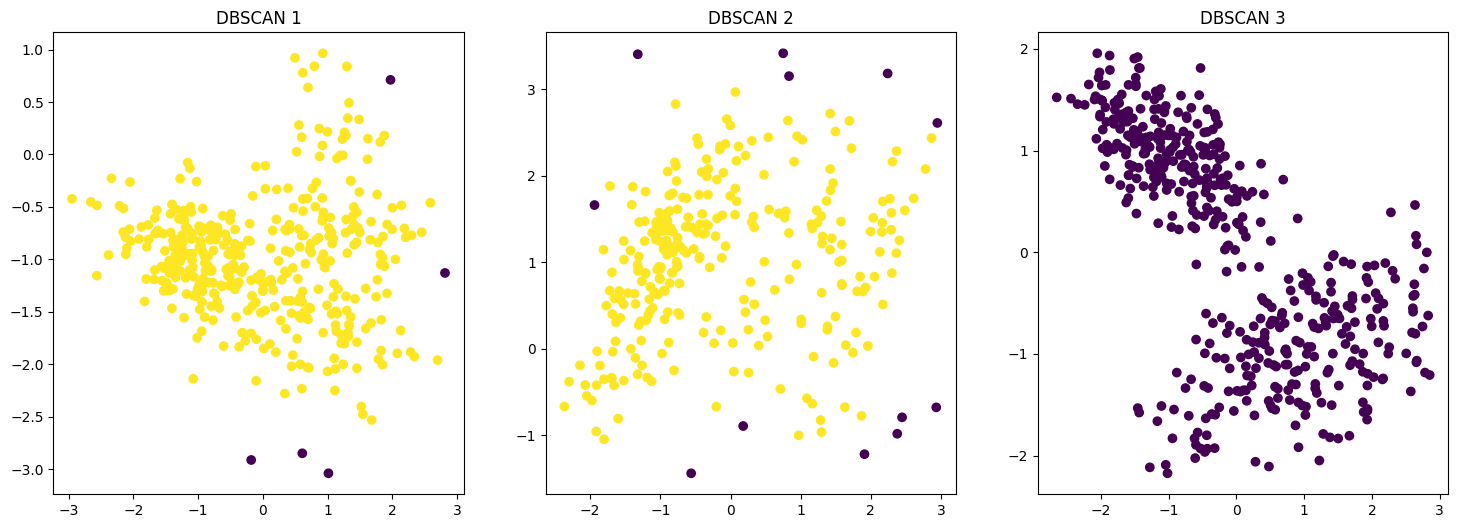

In [19]:
plt.figure(figsize=(18, 6))
for index, (data, model) in enumerate([(X_one, dbscan_one), (X_two,dbscan_two), (X_three, dbscan_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.title(f"DBSCAN {index+1}")
plt.show()

In [20]:
eps_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [3, 5, 10, 15]
best_params = dict()

for index, (X, y) in enumerate([(X_one, y_one), (X_two, y_two), (X_three, y_three)]):
    best_score = -1
    temporary_dict = dict()

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            rand = rand_score(y, dbscan.labels_)

            if rand > best_score:
                best_score = rand
                temporary_dict = {"eps": eps, 'min_samples': min_samples, 'best_rand': rand}

    best_params[f'DBSCAN {index+1}'] = temporary_dict

best_params

{'DBSCAN 1': {'eps': 0.1, 'min_samples': 5, 'best_rand': 0.5740977443609022},
 'DBSCAN 2': {'eps': 0.5, 'min_samples': 15, 'best_rand': 0.6169326366332439},
 'DBSCAN 3': {'eps': 0.1, 'min_samples': 5, 'best_rand': 0.5394711343656959}}

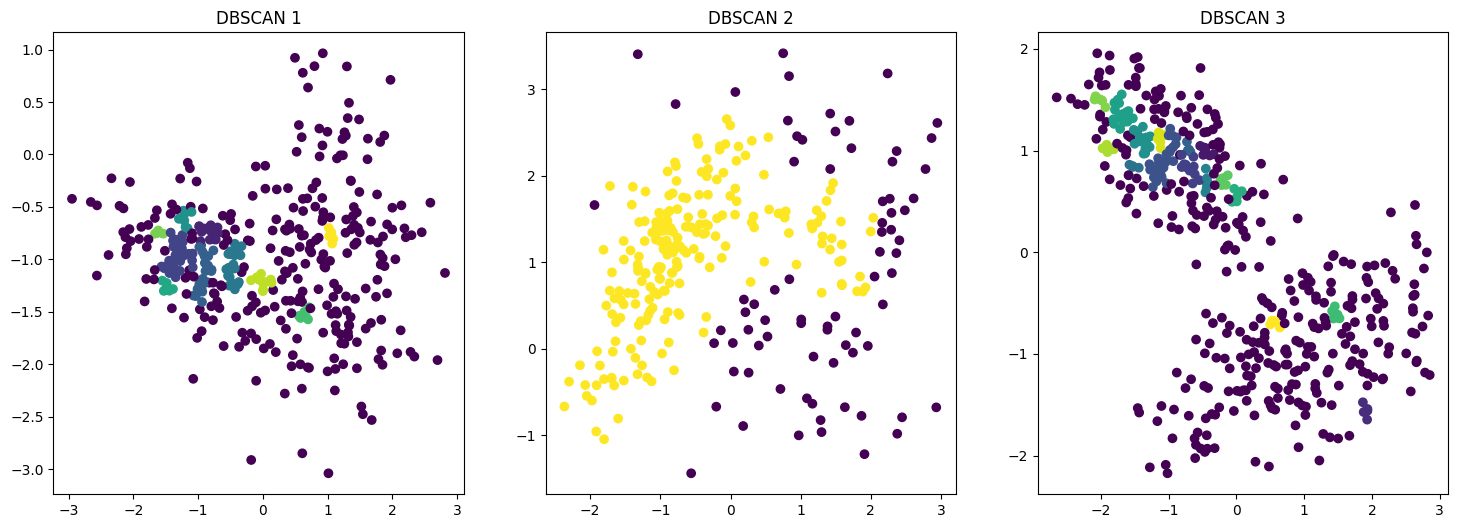

In [21]:
dbscan_one = DBSCAN(eps=0.1, min_samples=5).fit(X_one)
dbscan_two = DBSCAN(eps=0.5, min_samples=15).fit(X_two)
dbscan_three = DBSCAN(eps=0.1, min_samples=5).fit(X_three)

plt.figure(figsize=(18, 6))

for index, (data, model) in enumerate([(X_one, dbscan_one), (X_two, dbscan_two), (X_three, dbscan_three)]):
    plt.subplot(1, 3, index + 1)
    plt.scatter(data[:, 0], data[:, 1], c=model.labels_)
    plt.title(f"DBSCAN {index+1}")

plt.show()

In [22]:
print_metrics("DBSCAN", dbscan_one, dbscan_two, dbscan_three)

{'DBSCAN 1': {'adjusted_rand_score': 0.15,
              'calinski_harabasz_score': 12.93,
              'rand_score': 0.57,
              'silhouette_score': -0.28},
 'DBSCAN 2': {'adjusted_rand_score': 0.23,
              'calinski_harabasz_score': 103.88,
              'rand_score': 0.62,
              'silhouette_score': 0.33},
 'DBSCAN 3': {'adjusted_rand_score': 0.08,
              'calinski_harabasz_score': 12.0,
              'rand_score': 0.54,
              'silhouette_score': -0.36}}


## GaussianMixture без подбора гиперпараметров

In [23]:
gm_one = GaussianMixture(n_components=2, random_state=17).fit(X_one)
gm_two = GaussianMixture(n_components=2, random_state=17).fit(X_two)
gm_three = GaussianMixture(n_components=2, random_state=17).fit(X_three)

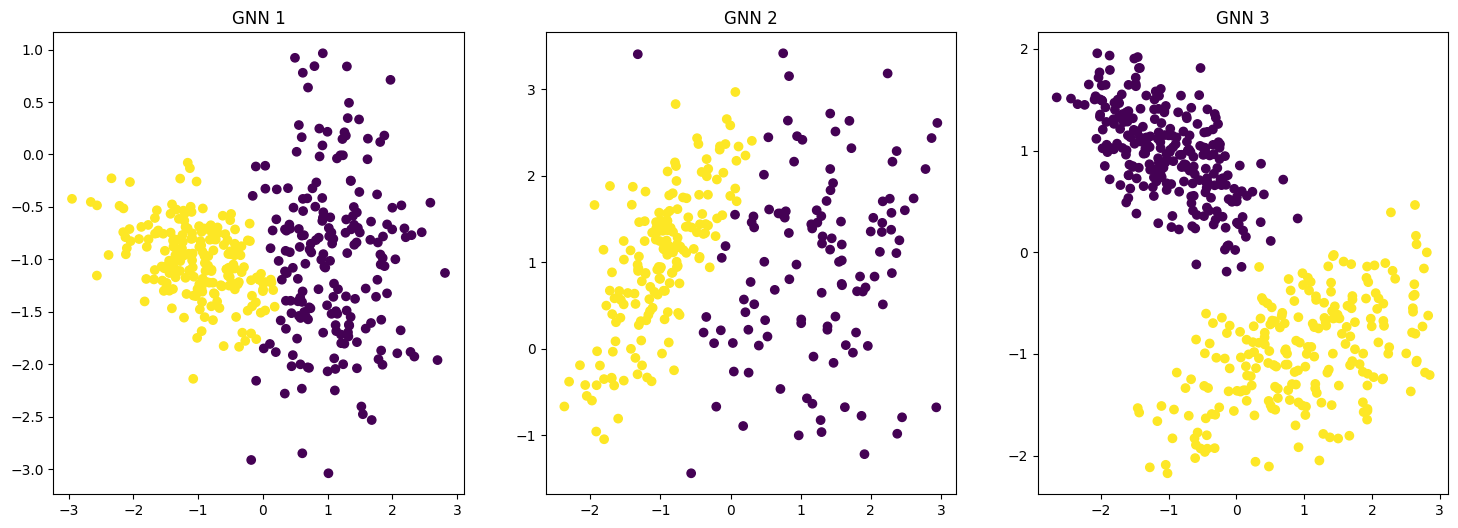

In [24]:
plt.figure(figsize=(18, 6))
for index, (data, model) in enumerate([(X_one, gm_one), (X_two, gm_two), (X_three, gm_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.predict(data))
    plt.title(f"GNN {index+1}")
plt.show()

In [25]:
print_metrics("GaussianMixture", gm_one, gm_two, gm_three)

{'GaussianMixture 1': {'adjusted_rand_score': 0.77,
                       'calinski_harabasz_score': 592.58,
                       'rand_score': 0.89,
                       'silhouette_score': 0.51},
 'GaussianMixture 2': {'adjusted_rand_score': 0.59,
                       'calinski_harabasz_score': 258.96,
                       'rand_score': 0.79,
                       'silhouette_score': 0.45},
 'GaussianMixture 3': {'adjusted_rand_score': 0.95,
                       'calinski_harabasz_score': 950.75,
                       'rand_score': 0.98,
                       'silhouette_score': 0.58}}


## GaussianMixture с подбором числа кластеров

In [26]:
n_iterations = 10
dict_aic = dict()
for index, data in enumerate([X_one, X_two, X_three]):
    scores = []
    best_aic = np.inf

    for iter in range(1, n_iterations+1):
        model = GaussianMixture(n_components=iter, random_state=17).fit(data)
        aic = model.aic(data)
        scores.append(aic)
        if aic < best_aic:
            best_aic = aic

    dict_aic[f'Model {index+1}'] = scores

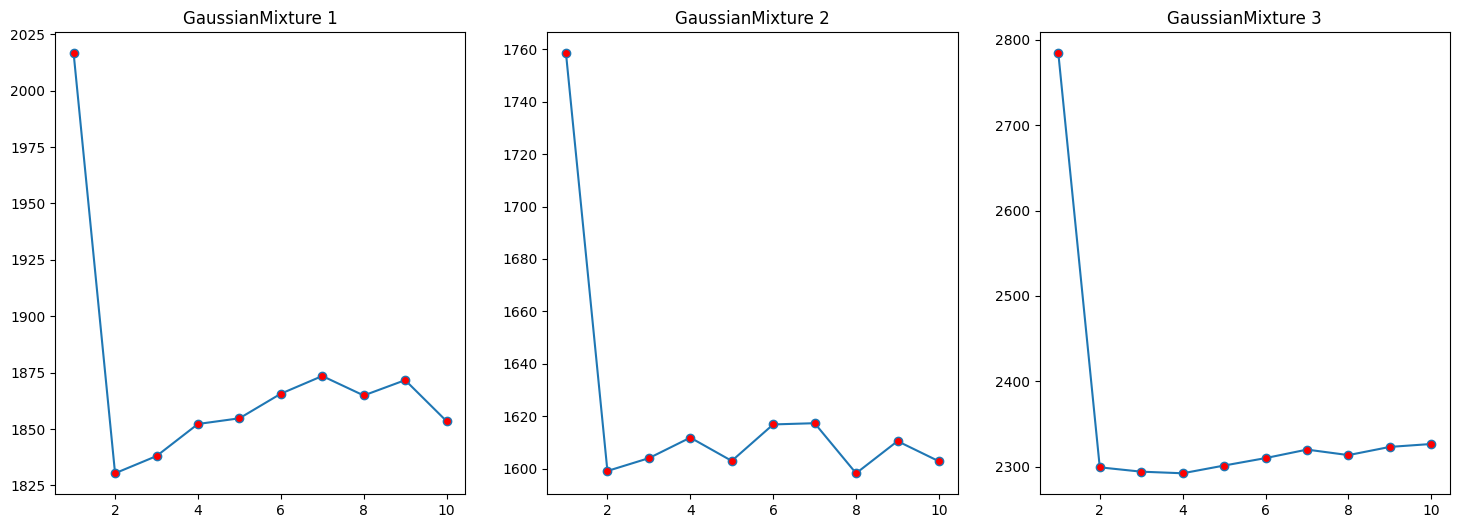

In [27]:
iterations = 10
plt.figure(figsize=(18, 6))
for index, data in enumerate([dict_aic['Model 1'], dict_aic['Model 2'], dict_aic['Model 3']]):
    plt.subplot(1, 3, index+1)
    plt.plot(range(1, iterations+1), data, marker='o', markerfacecolor=[1, 0, 0, 1])
    plt.title("GaussianMixture {}".format(index+1))
plt.show()

вот этот график показывает кол-во кластеров!

## AgglomerativeClustering без подбора гиперпараметров

In [28]:
ac_model_one  = AgglomerativeClustering().fit(X_one)
ac_model_two  = AgglomerativeClustering().fit(X_two)
ac_model_three  = AgglomerativeClustering().fit(X_three)

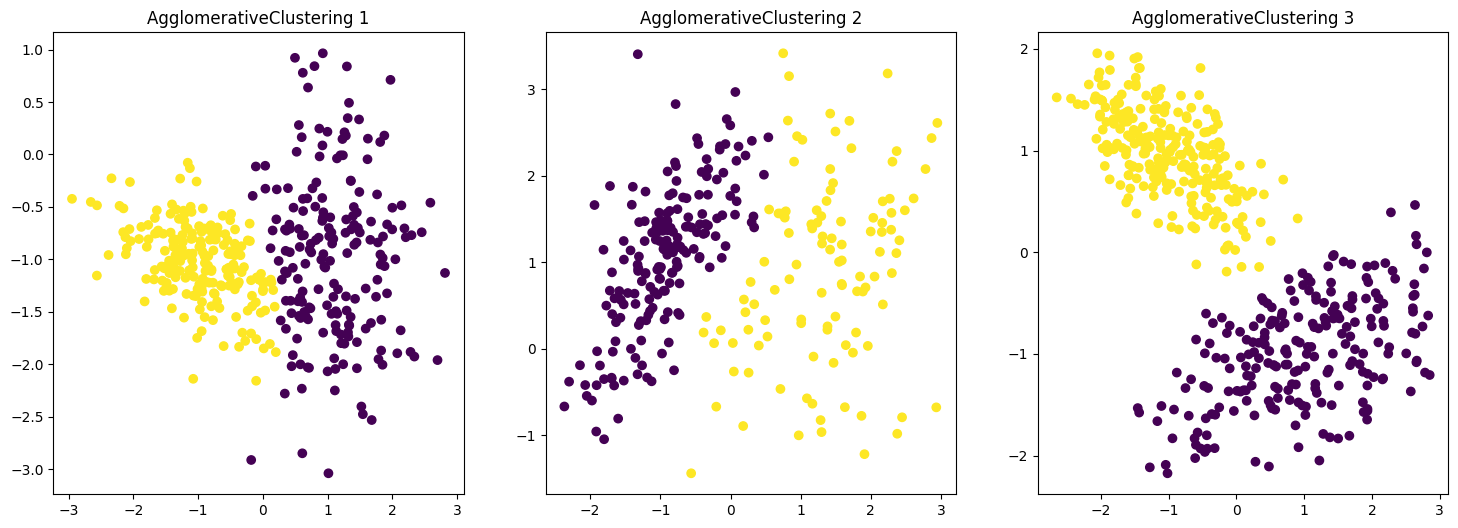

In [29]:
plt.figure(figsize=(18, 6))
for index, (data, model) in enumerate([(X_one, ac_model_one), (X_two, ac_model_two), (X_three, ac_model_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.title(f"AgglomerativeClustering {index+1}")
plt.show()

In [30]:
print_metrics("AgglomerativeClustering", ac_model_one, ac_model_two, ac_model_three)

{'AgglomerativeClustering 1': {'adjusted_rand_score': 0.74,
                               'calinski_harabasz_score': 592.78,
                               'rand_score': 0.87,
                               'silhouette_score': 0.52},
 'AgglomerativeClustering 2': {'adjusted_rand_score': 0.52,
                               'calinski_harabasz_score': 267.03,
                               'rand_score': 0.76,
                               'silhouette_score': 0.46},
 'AgglomerativeClustering 3': {'adjusted_rand_score': 0.94,
                               'calinski_harabasz_score': 944.83,
                               'rand_score': 0.97,
                               'silhouette_score': 0.58}}


## AgglomerativeClustering с подбором числа кластеров

In [31]:
n_iterations = 10
dict_rand = dict()

for index, (data, y) in enumerate([(X_one, y_one), (X_two, y_two), (X_three, y_three)]):
    scores = []
    best_rand_score = -np.inf

    for n_clusters in range(2, n_iterations+1):
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(data)
        rand_score_value = rand_score(y, model.labels_)
        scores.append(rand_score_value)
        if rand_score_value > best_rand_score:
            best_n_clusters = n_clusters

    dict_rand[f'Model {index+1}'] = scores

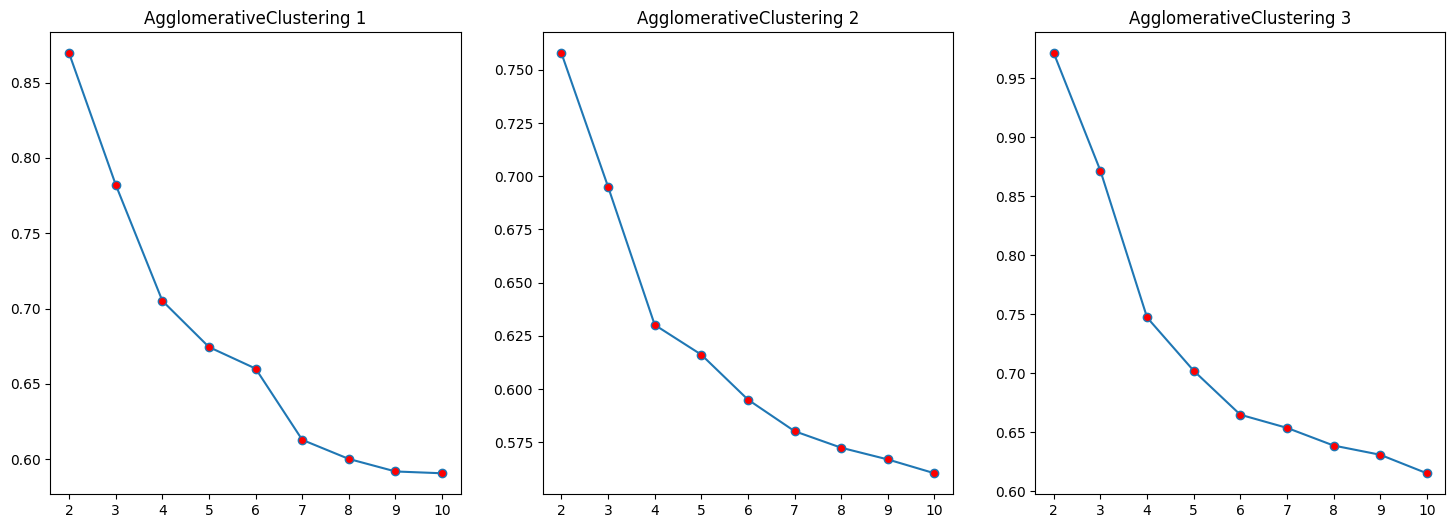

In [32]:
iterations = 10
plt.figure(figsize=(18, 6))
for index, data in enumerate([dict_rand['Model 1'], dict_rand['Model 2'], dict_rand['Model 3']]):
    plt.subplot(1, 3, index+1)
    plt.plot(range(2, iterations+1), data, marker='o', markerfacecolor=[1, 0, 0, 1])
    plt.title("AgglomerativeClustering {}".format(index+1))
plt.show()

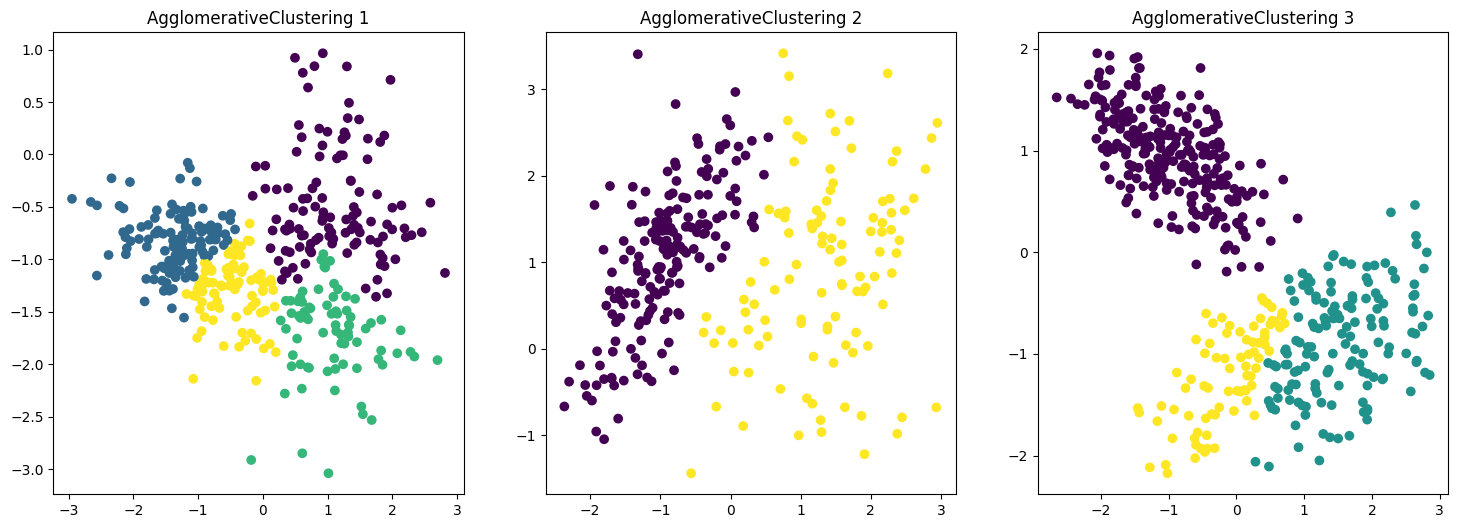

In [33]:
ac_model_one  = AgglomerativeClustering(4).fit(X_one)
ac_model_two  = AgglomerativeClustering(2).fit(X_two)
ac_model_three  = AgglomerativeClustering(3).fit(X_three)

plt.figure(figsize=(18, 6))
for index, (data, model) in enumerate([(X_one, ac_model_one), (X_two, ac_model_two), (X_three, ac_model_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.title(f"AgglomerativeClustering {index+1}")
plt.show()

In [34]:
print_metrics("AgglomerativeClustering", ac_model_one, ac_model_two, ac_model_three)

{'AgglomerativeClustering 1': {'adjusted_rand_score': 0.41,
                               'calinski_harabasz_score': 432.2,
                               'rand_score': 0.71,
                               'silhouette_score': 0.34},
 'AgglomerativeClustering 2': {'adjusted_rand_score': 0.52,
                               'calinski_harabasz_score': 267.03,
                               'rand_score': 0.76,
                               'silhouette_score': 0.46},
 'AgglomerativeClustering 3': {'adjusted_rand_score': 0.74,
                               'calinski_harabasz_score': 824.26,
                               'rand_score': 0.87,
                               'silhouette_score': 0.5}}


## Иерархическая кластеризация

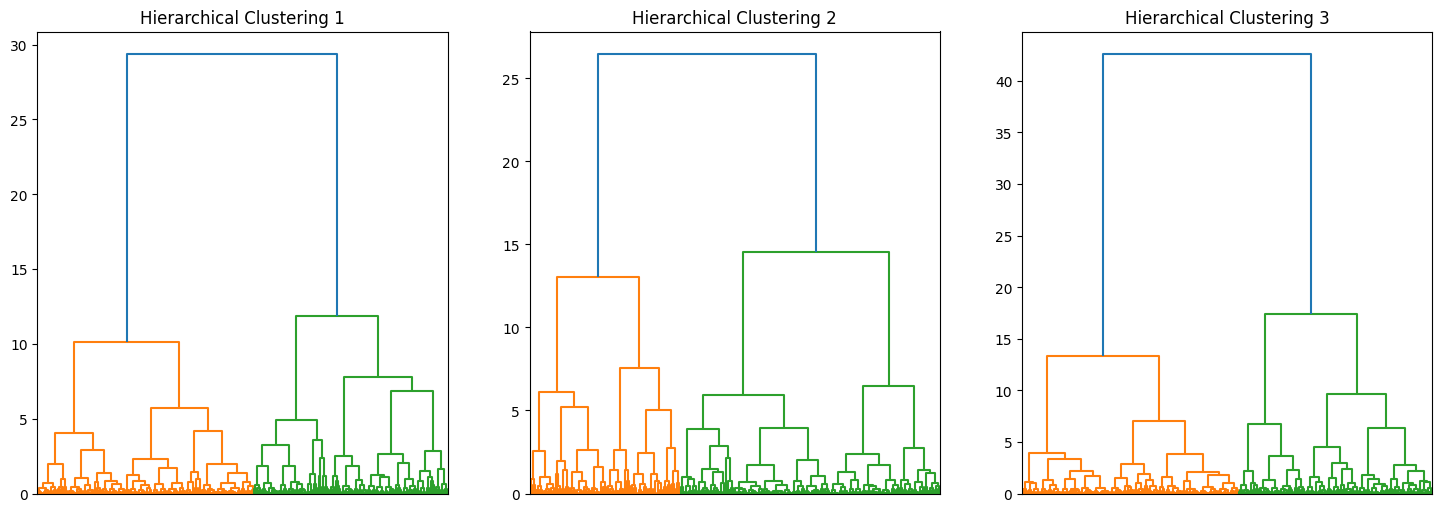

In [35]:
linkage_one = linkage(X_one, method='ward')
linkage_two = linkage(X_two, method='ward')
linkage_three = linkage(X_three, method='ward')

plt.figure(figsize=(18, 6))

for index, data in enumerate([linkage_one, linkage_two, linkage_three]):
    plt.subplot(1, 3, index+1)
    dendrogram(data)
    plt.title("Hierarchical Clustering {}".format(index+1))
    plt.gca().set_xticks([])
plt.show()

## Работа с датасетом для задачи классификации

In [85]:
path = 'Data4_preprocessed3.csv'
data = pd.read_csv(path)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80871 entries, 0 to 80870
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    80871 non-null  float64
 1   est_diameter_max    80871 non-null  float64
 2   relative_velocity   80871 non-null  float64
 3   miss_distance       80871 non-null  float64
 4   absolute_magnitude  80871 non-null  float64
 5   hazardous           80871 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.7 MB


In [87]:
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.1,0
1,0.030518,0.068240,7864.348060,3.268186e+07,24.7,0
2,0.055533,0.124177,55257.544508,6.538636e+07,23.4,0
3,0.019256,0.043057,41531.404722,1.260796e+07,25.7,0
4,0.139494,0.311918,67639.394481,7.130590e+07,21.4,0


In [88]:
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.1,0
1,0.030518,0.068240,7864.348060,3.268186e+07,24.7,0
2,0.055533,0.124177,55257.544508,6.538636e+07,23.4,0
3,0.019256,0.043057,41531.404722,1.260796e+07,25.7,0
4,0.139494,0.311918,67639.394481,7.130590e+07,21.4,0


In [89]:
y= data['hazardous']

In [90]:
y

0        0
1        0
2        0
3        0
4        0
        ..
80866    0
80867    0
80868    0
80869    0
80870    0
Name: hazardous, Length: 80871, dtype: int64

In [91]:
data = data.drop('hazardous', axis = 1)

In [92]:
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.016016,0.035813,56014.078517,1.024333e+06,26.1
1,0.030518,0.068240,7864.348060,3.268186e+07,24.7
2,0.055533,0.124177,55257.544508,6.538636e+07,23.4
3,0.019256,0.043057,41531.404722,1.260796e+07,25.7
4,0.139494,0.311918,67639.394481,7.130590e+07,21.4


In [93]:
X = data

In [107]:
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40
...,...,...,...,...,...
80866,0.008405,0.018795,8424.366481,3.821292e+06,27.50
80867,0.017561,0.039268,23264.740825,1.635007e+06,25.90
80868,0.110804,0.247765,24802.519406,3.351901e+07,21.90
80869,0.044112,0.098637,45763.317060,2.694877e+07,23.90


## KMeans

In [108]:
kmeans = KMeans().fit(X)

C:\Users\NoteBook\Арина\учеба\labs\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [109]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(X)

In [110]:
import pickle
with open('kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

## DBSCAN

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X_dbscan = scaler.fit_transform(X)

In [48]:
dbscan = DBSCAN().fit(X_dbscan)

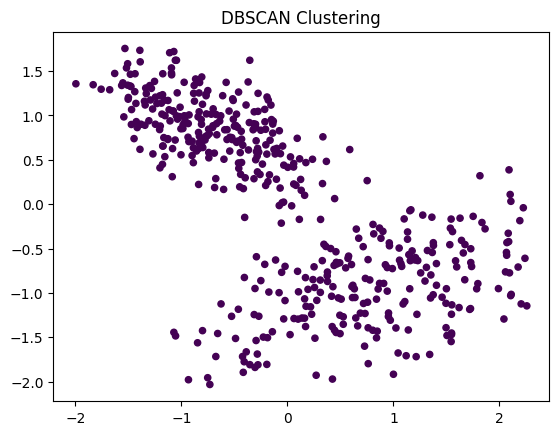

In [49]:
plt.scatter(X_dbscan[:, 0], X_dbscan[:, 1], c=dbscan.labels_, cmap='viridis', s=20)
plt.title('DBSCAN Clustering')
plt.show()

In [50]:
eps_values = [0.1, 0.3, 0.5, 1, 2, 3]
min_samples_values = [3, 4, 5, 6, 7]
best_score = -np.inf

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        rand = rand_score(y, dbscan.labels_)

        if rand > best_score:
            best_score = rand
            temporary_dict = {"eps": eps, 'min_samples': min_samples, 'best_rand': rand}

In [51]:
temporary_dict

{'eps': 0.3, 'min_samples': 3, 'best_rand': 0.9454221940348466}

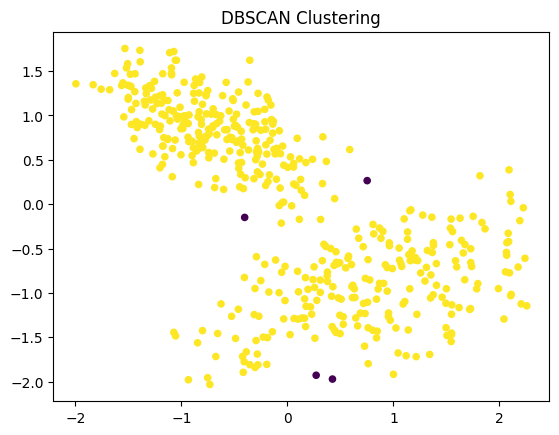

In [52]:
dbscan = DBSCAN(eps=0.3, min_samples=3).fit(X_dbscan)
plt.scatter(X_dbscan[:, 0], X_dbscan[:, 1], c=dbscan.labels_, cmap='viridis', s=20)
plt.title('DBSCAN Clustering')
plt.show()

In [53]:
print(f'silhouette_score: {round(silhouette_score(X_dbscan, dbscan.labels_),1)}')
print(f'calinski_harabasz_score: {round(calinski_harabasz_score(X_dbscan, dbscan.labels_), 2)}')
print(f'rand_score: {round(rand_score(dbscan.labels_, y), 2)}')
print(f'adjusted_rand_score: {round(adjusted_rand_score(y, dbscan.labels_), 2)}')

silhouette_score: 0.0
calinski_harabasz_score: 1.94
rand_score: 0.5
adjusted_rand_score: -0.0


## Иерархическая кластеризация

In [54]:
X_hierarchical = X[:10000, :]
y_hierarchical = y[:10000]

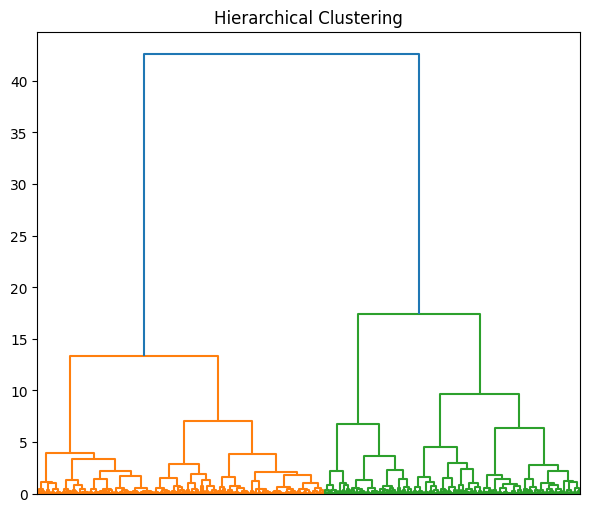

In [55]:
linkage = linkage(X_hierarchical, method='ward')
plt.figure(figsize=(7, 6))
dendrogram(linkage)
plt.title("Hierarchical Clustering")
plt.gca().set_xticks([])
plt.show()

In [56]:

num_clusters = 2
labels = fcluster(linkage, num_clusters, criterion='maxclust')
print(f'silhouette_score: {round(silhouette_score(X_hierarchical, labels), 2)}')
print(f'calinski_harabasz_score: {round(calinski_harabasz_score(X_hierarchical, labels), 2)}')
print(f'rand_score: {round(rand_score(y_hierarchical, labels), 2)}')
print(f'adjusted_rand_score: {round(adjusted_rand_score(y_hierarchical, labels), 2)}')

silhouette_score: 0.58
calinski_harabasz_score: 944.83
rand_score: 0.97
adjusted_rand_score: 0.94
